In [1]:
# https://hub.arcgis.com/pages/a0db1c6905934fb5a522137f0fec6c7b
# https://spatialvision.com.au/blog-open-source-spatial-geopandas-part-1/

import geopandas as gpd
# folium

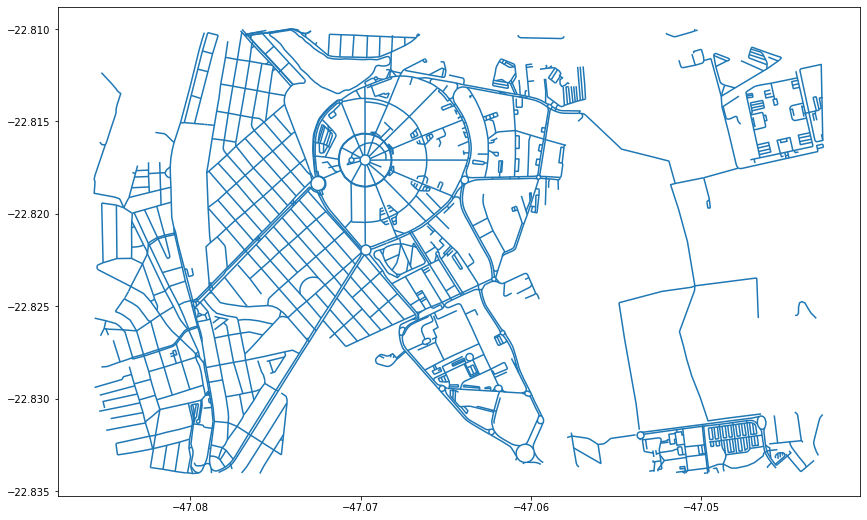

In [2]:
# bbbike: https://extract.bbbike.org/
# use bbbike to obtain shape files

# Unicamp Shapes:
# landuse
# natural
# places
# points
# railways
# roads
# waterways
# buildings
unicamp_df_roads = gpd.read_file('unicamp/shape/roads.shp')
ax = unicamp_df_roads.plot(figsize=(17, 9))

In [3]:
unicamp_df = gpd.read_file('unicamp/shape/buildings.shp')
unicamp_df.head()

,osm_id,name,type,geometry
0,95011154,IC 3,university,"POLYGON ((-47.06377 -22.81368, -47.06375 -22.8..."
1,95011157,Banco Santander,bank,"POLYGON ((-47.06880 -22.81689, -47.06881 -22.8..."
2,95011161,Ciclo Básico II,university,"POLYGON ((-47.07069 -22.81797, -47.07050 -22.8..."
3,95011169,IC - Instituto de Computação,university,"POLYGON ((-47.06520 -22.81481, -47.06452 -22.8..."
4,95011172,IC 3.5,university,"POLYGON ((-47.06422 -22.81356, -47.06417 -22.8..."


In [4]:
print(unicamp_df.geometry.iloc[0])

POLYGON ((-47.063773 -22.8136798, -47.0637523 -22.8136705, -47.0636838 -22.8138006, -47.0640575 -22.8139678, -47.0641095 -22.8138691, -47.0640289 -22.813833, -47.0641053 -22.8136878, -47.0639184 -22.8136043, -47.0638586 -22.8137178, -47.0638184 -22.8136998, -47.063773 -22.8136798))


In [5]:
# crs - sistema de coordenadas
unicamp_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

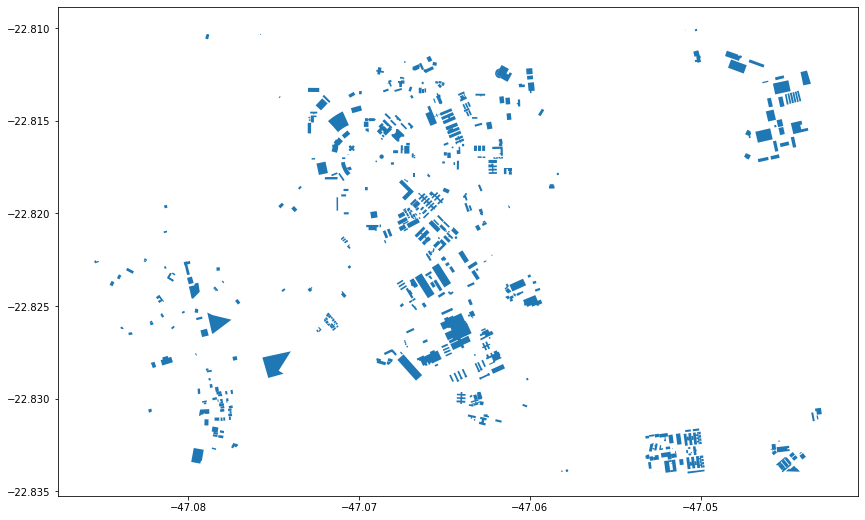

In [6]:
ax = unicamp_df.plot(figsize=(17, 9))

,osm_id,name,type,geometry
3,95011169,IC - Instituto de Computação,university,"POLYGON ((-47.06520 -22.81481, -47.06452 -22.8..."


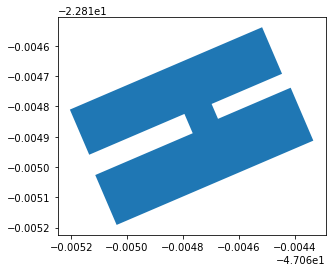

In [7]:
ic_predio = unicamp_df.query('osm_id == 95011169')
ax = ic_predio.plot()
ic_predio.head()

# UTM crs

Características:

- Zona/Fuso 23K (próximo a Paraty-Brasil)
- Datum WGS-84
- Hemisfério sul. 

Referências:

- https://ocefpaf.github.io/python4oceanographers/blog/2013/12/16/utm/
- https://cursos.alura.com.br/forum/topico-erro-ao-reprojetar-usando-a-funcao-to_crs-77139


In [8]:
# utm
unicamp_dff = gpd.read_file('unicamp/shape/buildings.shp')

# unicamp_utm_df = unicamp_ddf.to_crs(3395) # EPSG:3395
# unicamp_utm_df = unicamp_dff.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')  
unicamp_utm_df = unicamp_dff.to_crs('+proj=utm +zone=23 +south +ellps=WGS84 +datum=WGS84  +units=km +no_defs')  

unicamp_utm_df.crs

<Projected CRS: +proj=utm +zone=23 +south +ellps=WGS84 +datum=WGS8 ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

POLYGON ((288.1799703269987 7475.625999935552, 288.1820811749963 7475.627059583277, 288.1893152771934 7475.612749569809, 288.1512068410312 7475.593696449127, 288.1457153338292 7475.604552642126, 288.1539345389187 7475.608666273175, 288.1458659525313 7475.624637228338, 288.1649254858368 7475.634152802168, 288.1712407039064 7475.621668726523, 288.1753401241485 7475.623719854217, 288.1799703269987 7475.625999935552))


,osm_id,name,type,geometry
0,95011154,IC 3,university,"POLYGON ((288.180 7475.626, 288.182 7475.627, ..."
1,95011157,Banco Santander,bank,"POLYGON ((287.669 7475.263, 287.668 7475.259, ..."
2,95011161,Ciclo Básico II,university,"POLYGON ((287.476 7475.141, 287.495 7475.157, ..."
3,95011169,IC - Instituto de Computação,university,"POLYGON ((288.035 7475.499, 288.105 7475.530, ..."
4,95011172,IC 3.5,university,"POLYGON ((288.134 7475.638, 288.139 7475.628, ..."


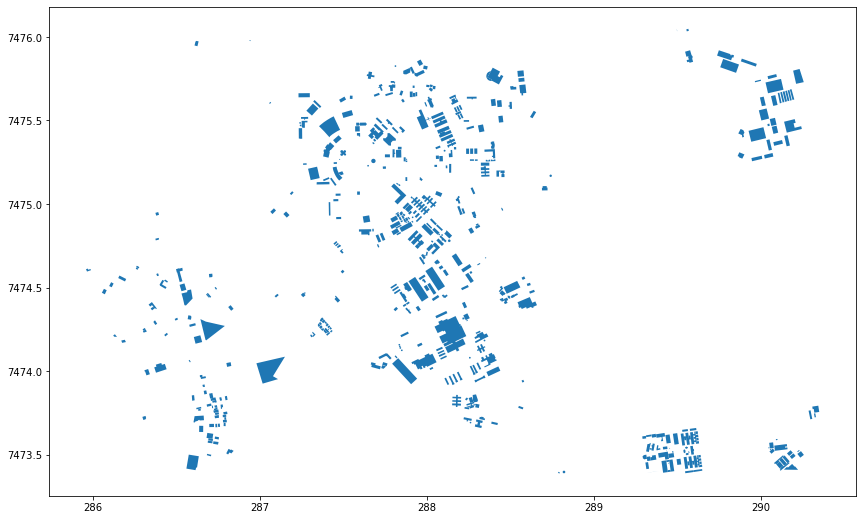

In [9]:
ax = unicamp_utm_df.plot(figsize=(17, 9))
unicamp_utm_df.head()

In [10]:
# Get plot [bottom, top] & [left, right] (km)
print('y-axis range [bottom, top]:',ax.get_ylim())
print('x-axis range [left, right]:',ax.get_ylim())

# Get heigth and width (km)
height = (ax.get_ylim()[1] - ax.get_ylim()[0]) 
width = (ax.get_xlim()[1] - ax.get_xlim()[0]) 
print('\nY (km):', height)
print('X (km):', width )

# Unicamp study area - NS3
print('Area (km2):', height * width)

# comparar area de estudo comparar com calculo feito em: 
# https://unicamp-arcgis.maps.arcgis.com/apps/View/index.html?appid=1d96ada62af4451bb4972b9779d09e66

y-axis range [bottom, top]: (7473.254198866587, 7476.181811324679)
x-axis range [left, right]: (7473.254198866587, 7476.181811324679)

Y (km): 2.9276124580919713
X (km): 4.826633087201344
Area (km2): 14.130511156729566


,osm_id,name,type,geometry
3,95011169,IC - Instituto de Computação,university,"POLYGON ((288.035 7475.499, 288.105 7475.530, ..."


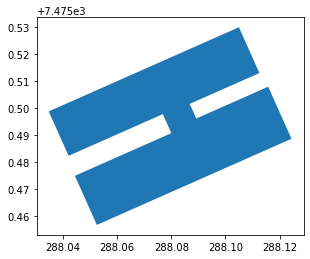

In [11]:
ic_predio = unicamp_utm_df.query('osm_id == 95011169')
ax = ic_predio.plot()

ic_predio.head()

In [12]:
unicamp_utm_df['area'] = unicamp_utm_df.geometry.area # km
unicamp_utm_df

,osm_id,name,type,geometry,area
0,95011154,IC 3,university,"POLYGON ((288.180 7475.626, 288.182 7475.627, ...",0.000947
1,95011157,Banco Santander,bank,"POLYGON ((287.669 7475.263, 287.668 7475.259, ...",0.000532
2,95011161,Ciclo Básico II,university,"POLYGON ((287.476 7475.141, 287.495 7475.157, ...",0.002011
3,95011169,IC - Instituto de Computação,university,"POLYGON ((288.035 7475.499, 288.105 7475.530, ...",0.003076
4,95011172,IC 3.5,university,"POLYGON ((288.134 7475.638, 288.139 7475.628, ...",0.000567
...,...,...,...,...,...
504,698317159,Nudecri / Labeurb,university,"POLYGON ((288.461 7474.413, 288.467 7474.401, ...",0.000606
505,698317160,None,university,"POLYGON ((288.483 7474.446, 288.489 7474.435, ...",0.000208
506,747442133,O Funcional,None,"POLYGON ((286.679 7474.459, 286.695 7474.440, ...",0.000131
507,747442134,Jardim Aéreo,None,"POLYGON ((286.683 7474.462, 286.690 7474.468, ...",0.000279
